# **NLP FOR SENTIMENT ANALYSIS**:

#### Date: 10/3/2025 | Dataset: IMDB Movies reviews
### Working with Kaeggle dataset

#### **STEPS TO LINK TO KAGGLE**
1. Install Kaggle
2. Download Kaggle API (in your Kaggle account's settings): a .kaggle.json doc
3. Upload this kaggle.json manually, when prompted:
```python
from google.colab import files
files.upload().
```
Select the *kaggle.json* file from your computer

4. Authenticate your Kaggle credentials
5. Download dataset & unzip
---
#### Notes:
❌ **Do not share your Kaggle API**
✅ **Save you API key kaggle.json**

## **KAGGLE SET UP:** INSTALL & ACCESS KAGGLE

In [1]:
# ✅ Step 1: Install Kaggle
!pip install kaggle

In [2]:
# ✅ Step 2: Upload kaggle.json manually
from google.colab import files
files.upload()  # Choose the kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gigiqa99","key":"c959d50f21b7de27335192f447339438"}'}

In [3]:
# ✅ STEP 3: Set up the Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ✅ STEP 4: Download the dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# ✅ STEP 5: Unzip the dataset (automatically creates a .csv file)
!unzip imdb-dataset-of-50k-movie-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 802MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


## **PART 1:** INSTALL & IMPORT PACKAGES, NTLK & Libraries

* **Installs 3 powerful gradient boosting ML libraries** for classification and regression(XGBoost, LightGBM, and CatBoost) into the env.
* `-qqq` **"quiet mode"** installation, suppressing installation messages and progress output.

**What each library does:**
- **XGBoost**: Optimized gradient boosting with regularization for better performance
- **LightGBM**: Fastest of the three, uses leaf-wise tree growth
- **CatBoost**: Best for categorical features, fastest prediction time

Often compared against each other to find which performs best on the dataset


In [4]:
# ============================================================
# PACKAGE INSTALLATIONS (Run first, only once, -q "quietly")
# ============================================================
!pip install xgboost lightgbm catboost nltk scikit-learn pandas matplotlib seaborn -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


### 1.1 BASIC LIBRARIES FOR TEXT PRE-PROCESSING & CLEANING

In [5]:
# ============================================================
# BASIC LIBRARY IMPORTS
# ============================================================
import os #Save/load files from a specific folder

# Standard Library imports (TEXT PRE-PROCESSING)
import re               # Regular Expression: strings manipulation w/pattern-based rules
import string           # Text transforming & cleaning (e.g: remove punctuation)

# Python Library imports (DATA PROCESSING & VISUALIZATION)
import numpy as np      # Linear algebra
import pandas as pd     # Data processing, .CSV file I/O
import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns   # Statistical data visualization
from collections import Counter

%matplotlib inline

**`%matplotlib inline`**: magic command to display plots below the cell instead of

*   List item
*   List item

pop-out window

### 1.2 ADDITIONAL 3rd-PARTY LIBRARIES

> **⚠️ NOTE 1: Always** run the **`nltk.download()`** in **Colab**. Colab doesn't save these resources across sessions (DON'T do this in Kaggle)

> **⚠️ NOTE 2:**  `punkt` used pickle files & was deprecated in 2024 (NLTK 3.8.1). The new **`punkt_tab`** updated version (**NLTK 3.8.2**), more precise & safer and has the same tokenization fxnlity.

Ideally, just use **`nltk.dowload('punkt_tab')`**. Though, Colab sometimes have issues with punkt_tab alone, write both if you have issue.

> `punkt` (old) = uses unsafe pickle files that can execute malicious code ❌

> **`punkt_tab`** (new) = does NOT use pickle files; uses a safer data format (likely tabular/structured data). Same tokenization, safer implementation ✅

NLTK replaced punkt with punkt_tab in version 3.8.2 (August 2024) specifically to eliminate the security risk of pickle files. Both do the same tokenization job, but punkt_tab is secure



In [6]:
# =============================================================================
# NLTK import for TEXT PRE-PROCESSING (Collab differs to Kaggle in this part)
# =============================================================================

import nltk
nltk.download('punkt')            # Required for word_tokenize old version
nltk.download('punkt_tab')        # Required for tokenization new version of "punkt"
nltk.download('stopwords')        # Required for stopwords
nltk.download('wordnet')          # Required for WordNetLemmatizer
nltk.download('omw-1.4')          # Required for lemmatizer synonyms

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize


# ==============================================
# IMPORT SCIKIT LEARN library for DATA ANALYSIS
# ==============================================
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# ==============================================
# Gradient boosting libraries
# ==============================================
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**What these do?**
1. **Feature Extraction** (ConvertText to Numbers): `CountVectorizer`: text-to-word frequency counts (Bag of Words).​
`TfidfVectorizer`: text-to-TF-IDF weighted features.
2. **Data Splitting**: `train_test_split`. Splits dataset into training/testing sets (80% train/20% test usually)
3. **ML Models/Classifiers:** Log Regression, RidgeClassifier (Linear w/ L2 regularization), SGDClassifier (Gradient Descent classifier for large data), Naive Bayes, SVC,RF, and gradient boosting algorithms (GradientBoost, AdaBoost, XGboost,LightGBM, CatBoost)
4. **Model Evaluation:** Accuracy (% corrects), Precision (%PPV), Recall (Sensitivity), F1-score (PPV & S mean), ROC-AUC, Classification Report (metrics summary), Confusion Matrix.

#### **NOTE:** Collab require a pretrained model called `punkt` for sentence and word tokenization.

> In **Google Colab**, this resource is **not preloaded**, so you **must download it manually**.

## **PART 2:** Load & Explore the Dataset
> #### Your 27MB dataset of movies reviews with labels (positive vs negative)

In [7]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.shape

(50000, 2)

In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
#checking missing values ----> There are no missings in this dataset
df.isnull().sum()

,0
review,0
sentiment,0


In [11]:
# FREQUENCY & % of 'positive' & 'negative' reviews

print(df['sentiment'].value_counts())
print("\n")
print((df['sentiment'].value_counts(normalize=True) * 100).round(2))

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


Great! this is balanced 50% vs 50%

In [12]:
# CHECK FOR DUPLICATES
#======================
df.duplicated().sum()

np.int64(418)

In [13]:
# Check if duplicates have conflicting labels
# ===========================================

duplicated_reviews = df[df.duplicated(subset=['review'], keep=False)]
max_unique_labels = duplicated_reviews.groupby('review')['sentiment'].nunique().max()

if max_unique_labels == 1:
    print("NO labeling conflicts, can safely drop duplicates")
else:
    print(f"WARNING: Found labeling conflicts - same review has {max_unique_labels} different labels")

NO labeling conflicts, can safely drop duplicates


In [14]:
# REMOVE DUPLICATES & DISPLAY UPDATED DATASET
# ============================================
df = df.drop_duplicates(subset=['review'], keep='first')
df.shape

(49582, 2)

> #### THIS IS A PERFECTLY **BALANCED DATASET** WITH MINIMAL NUMBERS OF DUPLICATES, despite dropping the 418 duplicates

## **PART 3:** Data Cleaning and Preprocessing
<h3>3.1 Identify Feature and Target Columns:</h3>

> * Rename Colums: Review : 'Text', Sentiment: 'Target'
> * Binary Target: 0 =negative, 1= positive

In [15]:
# ================
# RENAME COLUMNS
# ================
df = df.rename(columns={'review': 'text', 'sentiment': 'target'})

# The target column is categorical, so we will convert it to a numerical format (0 and 1)
df['target'] = df['target'].apply(lambda x: 1 if x == 'positive' else 0)

df.head()

,text,target
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### 3.2 EDA

In [16]:
# PERCENTAGE DISTRIBUTION OF "TARGET"
# ===================================
target_distribution = df['target'].value_counts(normalize=True) * 100
print("Target Column Distribution:")
print(f"Class 1 (Positive): {target_distribution[1]:.2f}%")
print(f"Class 0 (Negative): {target_distribution[0]:.2f}%")


Target Column Distribution:
Class 1 (Positive): 50.19%
Class 0 (Negative): 49.81%


In [17]:
# LENGTH OF EACH TEXT (movie review)
df['text_len'] = df.text.apply(len)
df.head()

,text,target,text_len
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [18]:
df.groupby('target').describe()

text_len                                                         \
          count         mean          std   min    25%    50%      75%   
target                                                                   
0       24698.0  1294.739615   946.501793  32.0  706.0  974.0  1568.00   
1       24884.0  1326.278532  1032.597204  65.0  692.0  969.0  1615.25   

                 
            max  
target           
0        8969.0  
1       13704.0

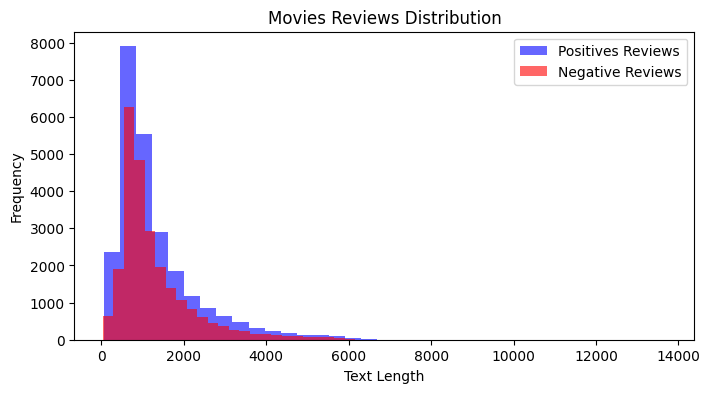

In [19]:
# PLOT REVIEWS DISTRIBUTION: Histogram
plt.figure(figsize=(8, 4))

bins = 35

df[df.target==1].text_len.plot(bins=bins, kind='hist', color='blue',
                                       label='Positives Reviews', alpha=0.6)
df[df.target==0].text_len.plot(bins=bins, kind='hist', color='red',
                                       label='Negative Reviews', alpha=0.6)
plt.legend()
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Movies Reviews Distribution")
plt.show()


> #### **Text Length and Structure Analysis**
> Check if there is any difference in the number of chars, words, or sentences between (-)ve & (+)ve reviews.
> For this, create variables to store these dataset that count the length of words,sentence, chars

In [20]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df[['num_characters', 'num_words', 'num_sentence']].describe().round(2)

,num_characters,num_words,num_sentence
count,49582.00,49582.00,49582.00
mean,1310.57,279.71,10.74
std,990.76,208.17,7.82
min,32.00,8.00,1.00
25%,699.00,151.00,6.00
50%,971.00,209.00,9.00
75%,1592.00,340.00,13.00
max,13704.00,2911.00,282.00


**NOTE:** could not tokenize here with punkt
✅ **Use `TreebankWordTokenize instead:**

* `TreebankWordTokenizer` is part of NLTK but does not use punkt or punkt_tab.
* `regexp_tokenize` is a simple and effective way to split text into sentences based on punctuation like . ! ? without relying on pretrained models.

In [22]:
#====================
# POSITIVE REVIEWS
#====================
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe().round(2)


,num_characters,num_words,num_sentence
count,24698.00,24698.00,24698.00
mean,1294.74,278.77,11.03
std,946.50,201.45,7.89
min,32.00,8.00,1.00
25%,706.00,153.00,6.00
50%,974.00,211.00,9.00
75%,1568.00,338.00,13.00
max,8969.00,1936.00,118.00


In [23]:
#====================
# NEGATIVE REVIEWS
#====================
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe().round(2)

,num_characters,num_words,num_sentence
count,24884.00,24884.00,24884.00
mean,1326.28,280.64,10.45
std,1032.60,214.63,7.73
min,65.00,11.00,1.00
25%,692.00,148.00,6.00
50%,969.00,207.00,9.00
75%,1615.25,343.00,13.00
max,13704.00,2911.00,282.00


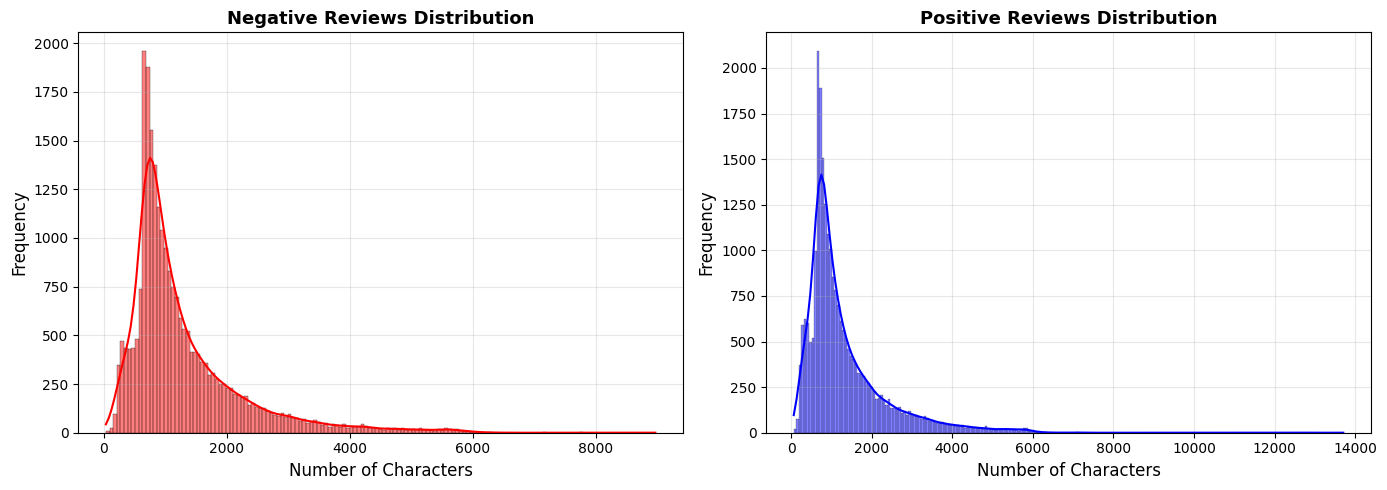

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove infinite values from the column
df['num_characters'] = df['num_characters'].replace([np.inf, -np.inf], np.nan)

# Then run Plotting:

# Create subplots for better comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Negative reviews histogram
sns.histplot(df[df['target'] == 0]['num_characters'], color='red', label='Negative Reviews', kde=True, ax=axes[0], stat='count')
axes[0].set_xlabel('Number of Characters', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Negative Reviews Distribution', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Positive reviews histogram
sns.histplot(df[df['target'] == 1]['num_characters'], color='blue', label='Positive Reviews', kde=True, ax=axes[1], stat='count')
axes[1].set_xlabel('Number of Characters', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Positive Reviews Distribution', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.015917,0.004498,-0.037210
num_characters,0.015917,1.000000,0.994587,0.800240
num_words,0.004498,0.994587,1.000000,0.815285
num_sentence,-0.037210,0.800240,0.815285,1.000000


| **CORRELATION**: NONE ⛔

### **3.3 Text Cleaning**
> #### Identify the columns you will work with, here is **`text`**
> #### Must have done first **`import re`** & **`import string`**

In [26]:
# ===================================================================================================
# REMOVE HTML/Tags/URLs,convert to lower case, remove numbers, punctuation,& extra whitespace
# ===================================================================================================

def clean_text(text):
    # 1. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # 2. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # 3. Convert to lowercase
    text = text.lower()
    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 6. Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply the cleaning function to the text column
df['text'] = df['text'].apply(clean_text)

print(df.head())

                                                text  target  text_len  \
0  one of the other reviewers has mentioned that ...       1      1761   
1  a wonderful little production the filming tech...       1       998   
2  i thought this was a wonderful way to spend ti...       1       926   
3  basically theres a family where a little boy j...       0       748   
4  petter matteis love in the time of money is a ...       1      1317   

   num_characters  num_words  num_sentence  
0            1761        380            10  
1             998        201             7  
2             926        205             4  
3             748        175             6  
4            1317        283             9  




```
# This is formatted as code
```

> #### 🛑 THIS **PRE-PROCESSING STEPS** must be ***done ONLY once*** as may cause errors
#### * Tokenization
#### * Lemmatization
#### * Stemming: Do either one Lemmas or Stems

### **3.3 Tokenization**:  DON'T RUN twice! 🛑

In [27]:
# Tokenize the text  (it is up to you how you tokenize...I'am starting with word tokenization )
df['text'] = df['text'].apply(nltk.word_tokenize)

print(df.head())

                                                text  target  text_len  \
0  [one, of, the, other, reviewers, has, mentione...       1      1761   
1  [a, wonderful, little, production, the, filmin...       1       998   
2  [i, thought, this, was, a, wonderful, way, to,...       1       926   
3  [basically, theres, a, family, where, a, littl...       0       748   
4  [petter, matteis, love, in, the, time, of, mon...       1      1317   

   num_characters  num_words  num_sentence  
0            1761        380            10  
1             998        201             7  
2             926        205             4  
3             748        175             6  
4            1317        283             9  


### **3.4 Stop Word Removal:** DON'T RUN twice! 🛑

In [28]:
# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

print(df.head())

                                                text  target  text_len  \
0  [one, reviewers, mentioned, watching, oz, epis...       1      1761   
1  [wonderful, little, production, filming, techn...       1       998   
2  [thought, wonderful, way, spend, time, hot, su...       1       926   
3  [basically, theres, family, little, boy, jake,...       0       748   
4  [petter, matteis, love, time, money, visually,...       1      1317   

   num_characters  num_words  num_sentence  
0            1761        380            10  
1             998        201             7  
2             926        205             4  
3             748        175             6  
4            1317        283             9  


### **3.5.  Lemmatization:** DON'T RUN twice! 🛑

In [29]:
# Lemmatize the text
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokens back into a single string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

print(df.head())

                                                text  target  text_len  \
0  one reviewer mentioned watching oz episode you...       1      1761   
1  wonderful little production filming technique ...       1       998   
2  thought wonderful way spend time hot summer we...       1       926   
3  basically there family little boy jake think t...       0       748   
4  petter matteis love time money visually stunni...       1      1317   

   num_characters  num_words  num_sentence  
0            1761        380            10  
1             998        201             7  
2             926        205             4  
3             748        175             6  
4            1317        283             9  


### **3.6. DATA VISUALIZATION OF PROCESSED TEXT:** Word Cloud & Frequencies

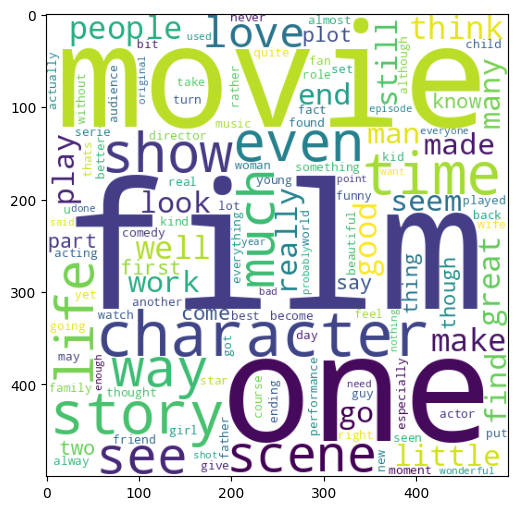

In [31]:
# Importing WordCloud for text visualization

from wordcloud import WordCloud

#######################
# POSTIIVE REVIEWS
#######################

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
positive_wc = wc.generate(df[df['target'] == 1]['text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(positive_wc)
plt.show()

#### **TOP 60 words in WordCloud:**  Positive vs Negative

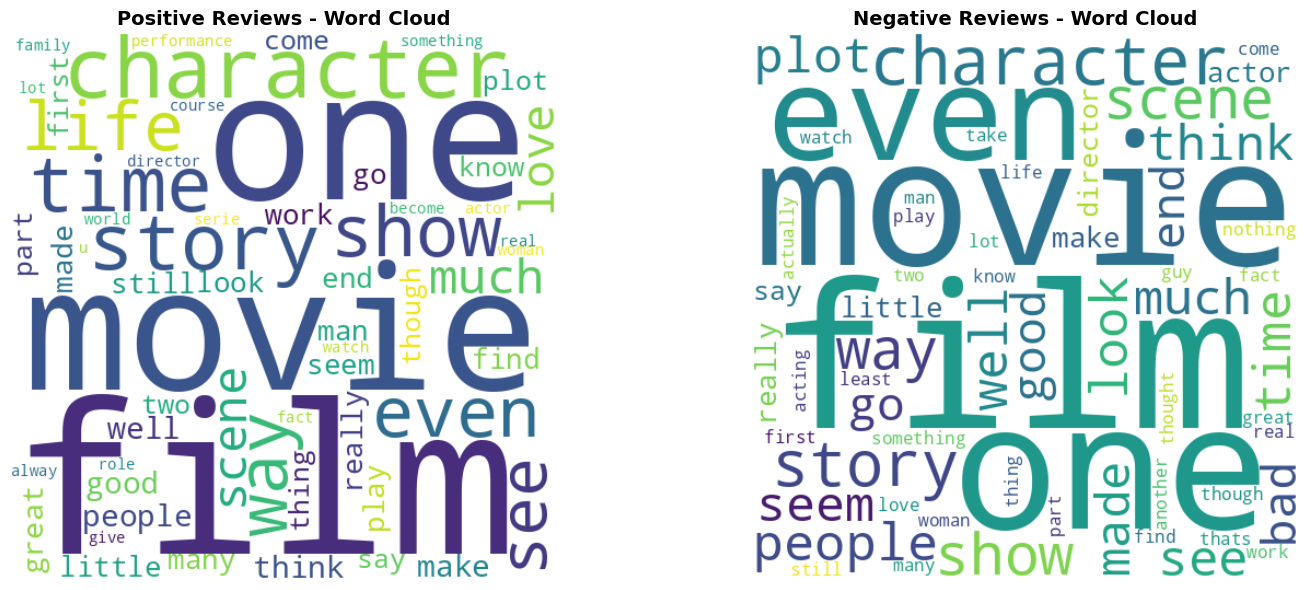

In [33]:
# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive reviews word cloud (top 60 most frequent)
positive_text = df[df['target'] == 1]['text'].str.cat(sep=" ")
wc_positive = WordCloud(width=500, height=500, min_font_size=10, background_color='white', max_words=60).generate(positive_text)
axes[0].imshow(wc_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Reviews - Word Cloud', fontsize=14, fontweight='bold')

# Negative reviews word cloud (top 60 most frequent)
negative_text = df[df['target'] == 0]['text'].str.cat(sep=" ")
wc_negative = WordCloud(width=500, height=500, min_font_size=10, background_color='white', max_words=60).generate(negative_text)
axes[1].imshow(wc_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Reviews - Word Cloud', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

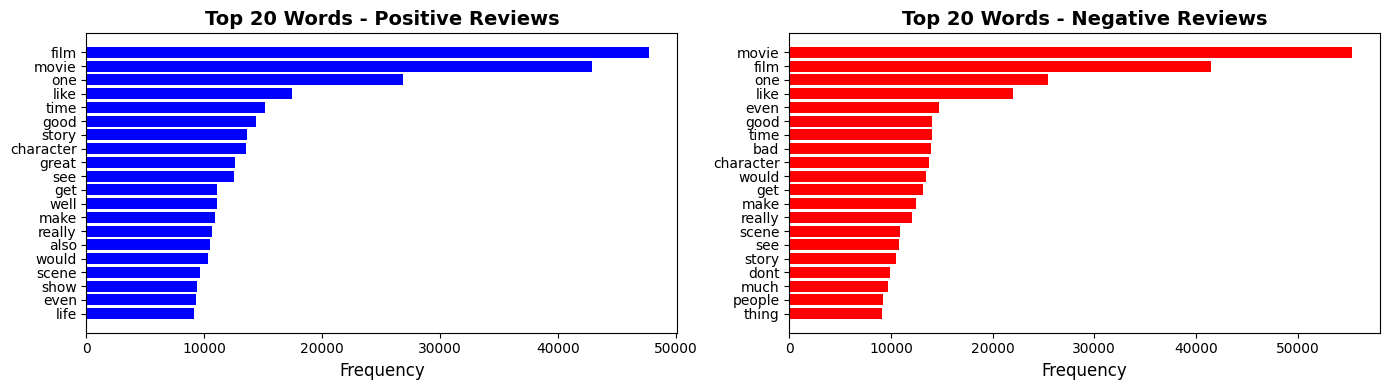

In [34]:
from collections import Counter
import matplotlib.pyplot as plt

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Positive reviews - top 20 words
positive_text = df[df['target'] == 1]['text'].str.cat(sep=" ").split()
positive_freq = Counter(positive_text).most_common(20)
pos_words, pos_counts = zip(*positive_freq)
axes[0].barh(pos_words, pos_counts, color='blue')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 20 Words - Positive Reviews', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Negative reviews - top 20 words
negative_text = df[df['target'] == 0]['text'].str.cat(sep=" ").split()
negative_freq = Counter(negative_text).most_common(20)
neg_words, neg_counts = zip(*negative_freq)
axes[1].barh(neg_words, neg_counts, color='red')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 20 Words - Negative Reviews', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## **4. Feature Engineering** (Text Representation)
> ### **MODEL BUILDING:**
> #### 1) split dataset > 2) initialize TF-IDF > 3) Transform training data >4)  Transform Test

In [35]:
# Separate features (X) and target (y)
X = df['text']
y = df['target']

# Split the data into training and testing sets  --- this is super important...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # We will use the top 5000 most frequent words  ***this is a hidden hyperparameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# TRANSFORM the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [36]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3093192 stored elements and shape (39665, 5000)>

## **5. Build and Evaluate the Harness Algorithm**
> ### 5.1 Define a list of Classifiers (already imported at the beginning)

In [38]:
# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    # "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

> ### 5.2 Train and Evaluate the Models in a Loop
> #### Use a progress bar

In [39]:
from tqdm import tqdm

# Create a list to store the results
results_list = []

# Loop through the classifiers with progress bar
for name, clf in tqdm(classifiers.items(), desc="Training models", total=len(classifiers)):
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")

    # Train the classifier
    clf.fit(X_train_tfidf, y_train)
    print("✓ Training complete")

    # Make predictions on the test data
    y_pred = clf.predict(X_test_tfidf)
    print("✓ Predictions complete")

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print results immediately
    print(f"\nResults for {name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")

    # Add the results to the list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    })

# Create DataFrame from the list
results = pd.DataFrame(results_list)

# Sort the results by ROC-AUC score
results = results.sort_values(by='ROC-AUC', ascending=False)

print(f"\n{'='*60}")
print("FINAL RESULTS (sorted by ROC-AUC)")
print(f"{'='*60}\n")
print(results.to_string(index=False))

Training models:   0%|          | 0/8 [00:00<?, ?it/s]


Training: Logistic Regression


Training models:  12%|█▎        | 1/8 [00:01<00:12,  1.74s/it]

✓ Training complete
✓ Predictions complete

Results for Logistic Regression:
  Accuracy:  0.8823
  Precision: 0.8728
  Recall:    0.8961
  F1-score:  0.8843
  ROC-AUC:   0.8823

Training: Multinomial NB
✓ Training complete
✓ Predictions complete


Training models:  25%|██▌       | 2/8 [00:01<00:04,  1.21it/s]


Results for Multinomial NB:
  Accuracy:  0.8519
  Precision: 0.8487
  Recall:    0.8578
  F1-score:  0.8532
  ROC-AUC:   0.8518

Training: Random Forest
✓ Training complete


Training models:  38%|███▊      | 3/8 [03:36<08:12, 98.44s/it]

✓ Predictions complete

Results for Random Forest:
  Accuracy:  0.8323
  Precision: 0.8367
  Recall:    0.8274
  F1-score:  0.8320
  ROC-AUC:   0.8323

Training: Gradient Boosting


Training models:  50%|█████     | 4/8 [07:18<09:49, 147.30s/it]

✓ Training complete
✓ Predictions complete

Results for Gradient Boosting:
  Accuracy:  0.7904
  Precision: 0.7587
  Recall:    0.8540
  F1-score:  0.8035
  ROC-AUC:   0.7901

Training: AdaBoost
✓ Training complete


Training models:  62%|██████▎   | 5/8 [08:09<05:37, 112.48s/it]

✓ Predictions complete

Results for AdaBoost:
  Accuracy:  0.7386
  Precision: 0.7195
  Recall:    0.7855
  F1-score:  0.7511
  ROC-AUC:   0.7384

Training: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:33:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training models:  75%|███████▌  | 6/8 [10:06<03:48, 114.10s/it]

✓ Training complete
✓ Predictions complete

Results for XGBoost:
  Accuracy:  0.8409
  Precision: 0.8249
  Recall:    0.8670
  F1-score:  0.8454
  ROC-AUC:   0.8408

Training: LightGBM
[LightGBM] [Info] Number of positive: 19906, number of negative: 19759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.247489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 566072
[LightGBM] [Info] Number of data points in the train set: 39665, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501853 -> initscore=0.007412
[LightGBM] [Info] Start training from score 0.007412


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
Training models:  88%|████████▊ | 7/8 [11:07<01:36, 96.82s/it] 

✓ Training complete
✓ Predictions complete

Results for LightGBM:
  Accuracy:  0.8476
  Precision: 0.8355
  Recall:    0.8672
  F1-score:  0.8511
  ROC-AUC:   0.8476

Training: CatBoost


Training models: 100%|██████████| 8/8 [38:16<00:00, 287.08s/it]

✓ Training complete
✓ Predictions complete

Results for CatBoost:
  Accuracy:  0.8625
  Precision: 0.8456
  Recall:    0.8881
  F1-score:  0.8664
  ROC-AUC:   0.8624

FINAL RESULTS (sorted by ROC-AUC)

              Model  Accuracy  Precision   Recall  F1-score  ROC-AUC
Logistic Regression  0.882323   0.872823 0.896143  0.884329 0.882269
           CatBoost  0.862458   0.845639 0.888108  0.866353 0.862357
     Multinomial NB  0.851871   0.848738 0.857774  0.853232 0.851847
           LightGBM  0.847635   0.835494 0.867216  0.851060 0.847558
            XGBoost  0.840879   0.824924 0.867015  0.845446 0.840776
      Random Forest  0.832308   0.836685 0.827441  0.832037 0.832327
  Gradient Boosting  0.790360   0.758701 0.853957  0.803516 0.790109
           AdaBoost  0.738631   0.719544 0.785456  0.751056 0.738446


/tmp/ipython-input-3399187141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC-AUC', y='Model', data=results, palette='viridis')


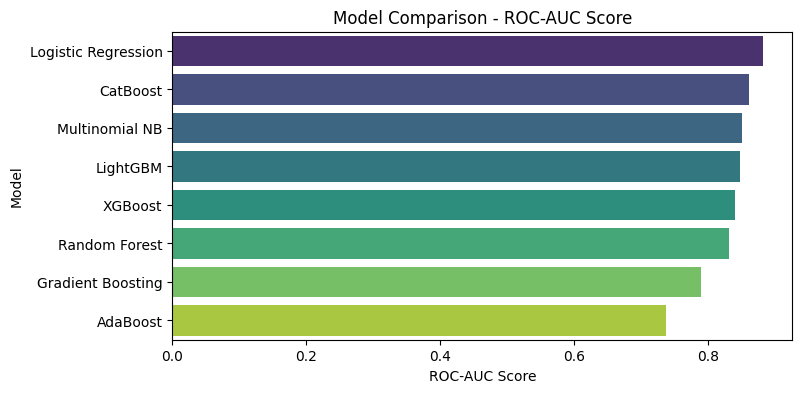

In [40]:
# Plot the results
plt.figure(figsize=(8, 4))
sns.barplot(x='ROC-AUC', y='Model', data=results, palette='viridis')
plt.title('Model Comparison - ROC-AUC Score')
plt.xlabel('ROC-AUC Score')
plt.ylabel('Model')
plt.show()

## **6. Visualization of Metrics by Model**
> ### Summary Stats

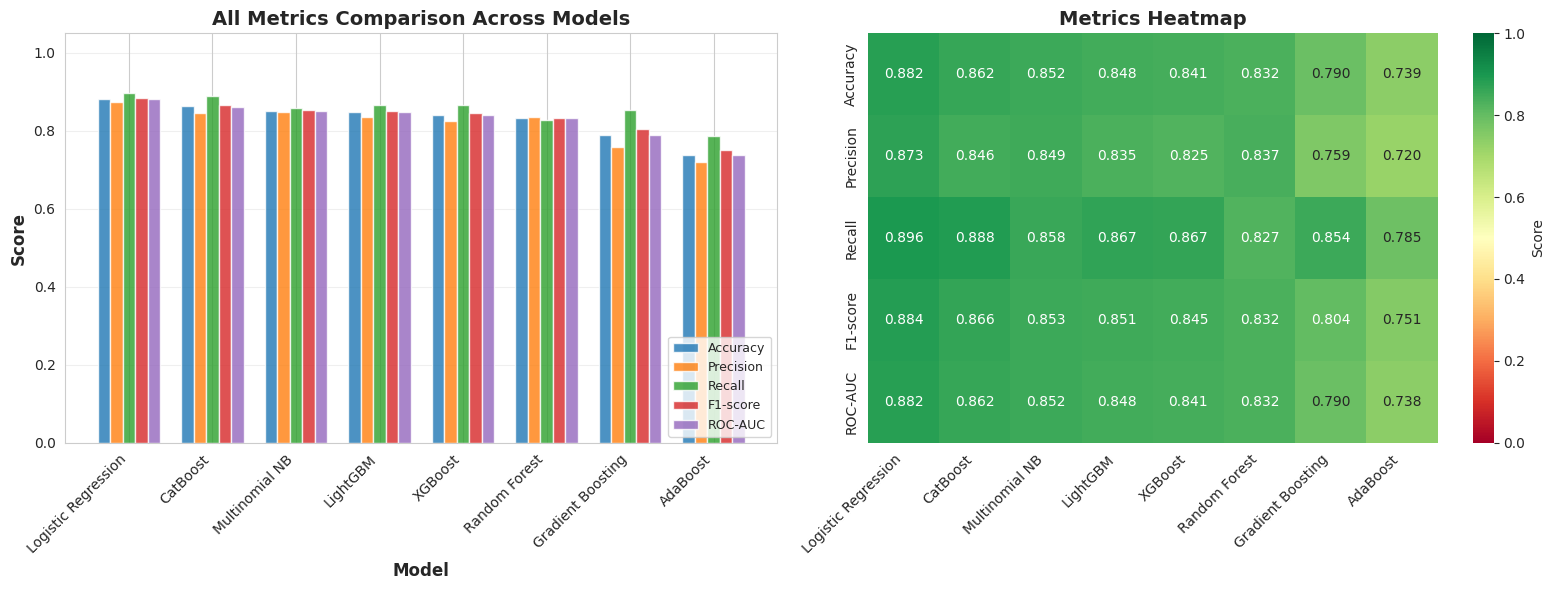

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")

# ============================================================
# FIGURE 1: Metrics Comparison and Heatmap
# ============================================================
fig1 = plt.figure(figsize=(16, 6))

# 1. Bar chart comparing all metrics across models
ax1 = plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
x = np.arange(len(results))
width = 0.15

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, results[metric], width, label=metric, alpha=0.8)

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('All Metrics Comparison Across Models', fontsize=14, fontweight='bold')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels(results['Model'], rotation=45, ha='right')
ax1.legend(loc='lower right', fontsize=9)
ax1.set_ylim([0, 1.05])
ax1.grid(axis='y', alpha=0.3)

# 2. Heatmap of all metrics
ax2 = plt.subplot(1, 2, 2)
heatmap_data = results[metrics].T
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
            xticklabels=results['Model'], yticklabels=metrics,
            vmin=0, vmax=1, cbar_kws={'label': 'Score'}, ax=ax2, annot_kws={'size': 10})
ax2.set_title('Metrics Heatmap', fontsize=14, fontweight='bold')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

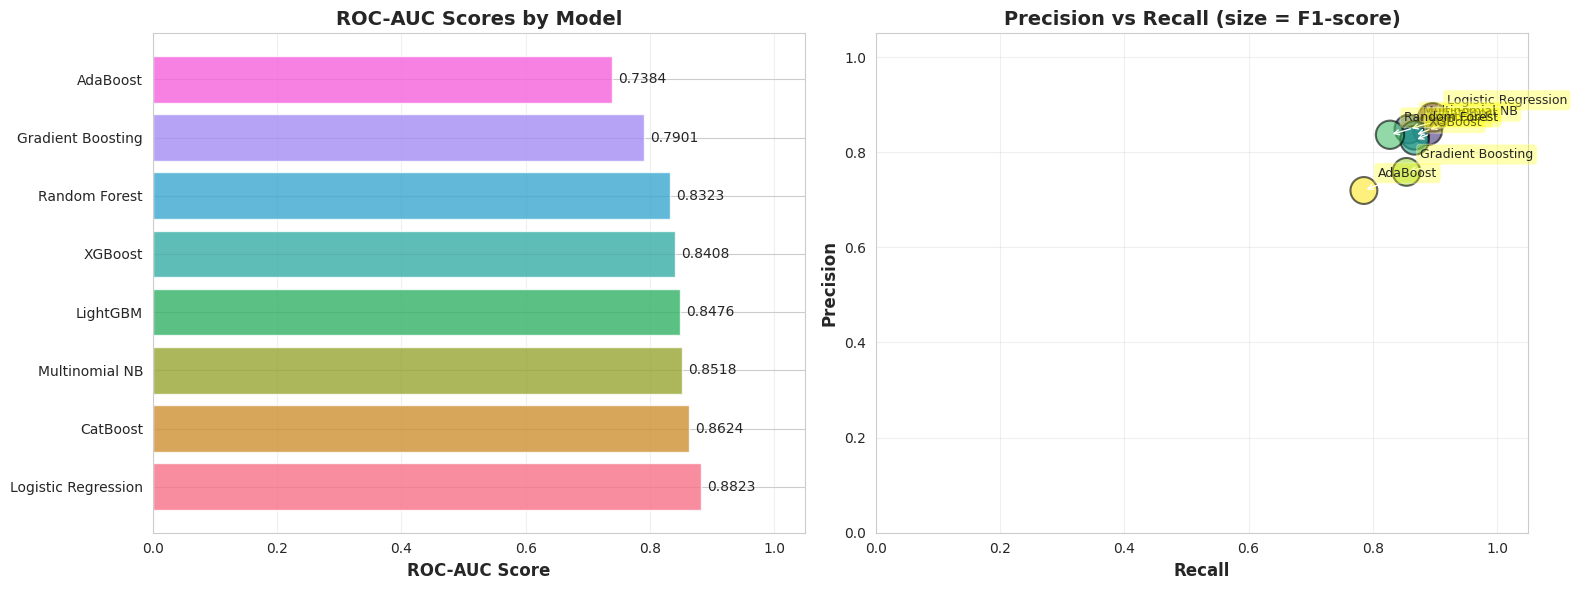

In [42]:
# ============================================================
# FIGURE 2: ROC-AUC and Precision vs Recall
# ============================================================
fig2 = plt.figure(figsize=(16, 6))

# 3. ROC-AUC comparison
ax3 = plt.subplot(1, 2, 1)
colors = sns.color_palette("husl", len(results))
bars = ax3.barh(results['Model'], results['ROC-AUC'], color=colors, alpha=0.8)
ax3.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax3.set_title('ROC-AUC Scores by Model', fontsize=14, fontweight='bold')
ax3.set_xlim([0, 1.05])
ax3.grid(axis='x', alpha=0.3)
for i, (bar, value) in enumerate(zip(bars, results['ROC-AUC'])):
    ax3.text(value + 0.01, i, f'{value:.4f}', va='center', fontsize=10)

# 4. Precision vs Recall scatter plot WITHOUT adjustText
ax4 = plt.subplot(1, 2, 2)
scatter = ax4.scatter(results['Recall'], results['Precision'],
                     s=results['F1-score']*500, alpha=0.6, c=range(len(results)),
                     cmap='viridis', edgecolors='black', linewidth=1.5)

for i, model in enumerate(results['Model']):
    ax4.annotate(model, (results['Recall'].iloc[i], results['Precision'].iloc[i]),
                xytext=(10, 10), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

ax4.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax4.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax4.set_title('Precision vs Recall (size = F1-score)', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3)
ax4.set_xlim([0, 1.05])
ax4.set_ylim([0, 1.05])


plt.tight_layout()
plt.show()

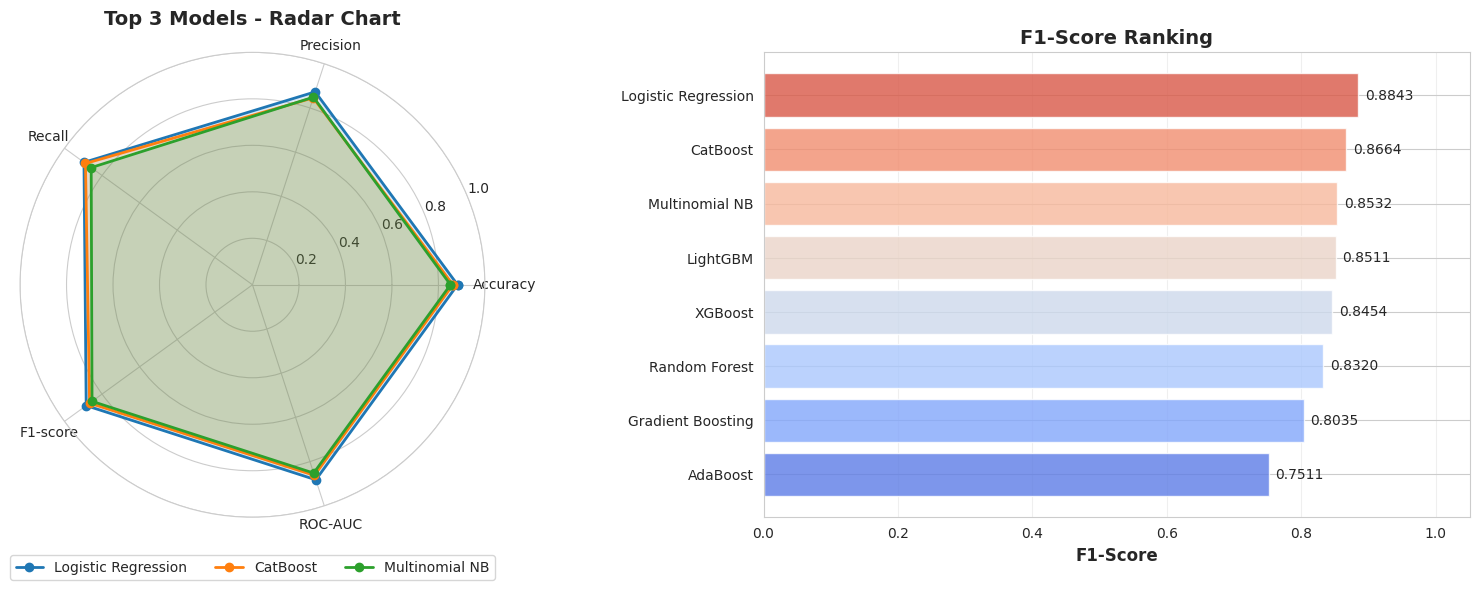


SUMMARY STATISTICS

Best performing model (by ROC-AUC): Logistic Regression
ROC-AUC Score: 0.8823

Best F1-Score: 0.8843 (Logistic Regression)
Best Precision: 0.8728 (Logistic Regression)
Best Recall: 0.8961 (Logistic Regression)
Best Accuracy: 0.8823 (Logistic Regression)

MEAN SCORES ACROSS ALL MODELS
Accuracy    : 0.8308
Precision   : 0.8178
Recall      : 0.8554
F1-score    : 0.8359
ROC-AUC     : 0.8307


In [43]:
# ============================================================
# FIGURE 3: Radar Chart and F1-Score Ranking
# ============================================================
fig3 = plt.figure(figsize=(16, 6))

# 5. Radar chart for top 3 models
ax5 = plt.subplot(1, 2, 1, projection='polar')
top_3 = results.head(3)
categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

for i, row in top_3.iterrows():
    values = row[metrics].values.tolist()
    values += values[:1]
    ax5.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax5.fill(angles, values, alpha=0.15)

ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(categories, fontsize=10)
ax5.set_ylim(0, 1)
ax5.set_title('Top 3 Models - Radar Chart', fontsize=14, fontweight='bold', pad=20)

# Move legend to bottom center instead of upper right
ax5.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fontsize=10, ncol=3, frameon=True)

ax5.grid(True)


# 6. F1-Score ranking
ax6 = plt.subplot(1, 2, 2)
results_sorted_f1 = results.sort_values('F1-score', ascending=True)
colors_f1 = sns.color_palette("coolwarm", len(results_sorted_f1))
bars = ax6.barh(results_sorted_f1['Model'], results_sorted_f1['F1-score'],
                color=colors_f1, alpha=0.8)
ax6.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax6.set_title('F1-Score Ranking', fontsize=14, fontweight='bold')
ax6.set_xlim([0, 1.05])
ax6.grid(axis='x', alpha=0.3)
for i, (bar, value) in enumerate(zip(bars, results_sorted_f1['F1-score'])):
    ax6.text(value + 0.01, i, f'{value:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================
# SUMMARY STATISTICS
# ============================================================
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"\nBest performing model (by ROC-AUC): {results.iloc[0]['Model']}")
print(f"ROC-AUC Score: {results.iloc[0]['ROC-AUC']:.4f}")
print(f"\nBest F1-Score: {results['F1-score'].max():.4f} ({results.loc[results['F1-score'].idxmax(), 'Model']})")
print(f"Best Precision: {results['Precision'].max():.4f} ({results.loc[results['Precision'].idxmax(), 'Model']})")
print(f"Best Recall: {results['Recall'].max():.4f} ({results.loc[results['Recall'].idxmax(), 'Model']})")
print(f"Best Accuracy: {results['Accuracy'].max():.4f} ({results.loc[results['Accuracy'].idxmax(), 'Model']})")

print("\n" + "="*60)
print("MEAN SCORES ACROSS ALL MODELS")
print("="*60)
for metric in metrics:
    print(f"{metric:12s}: {results[metric].mean():.4f}")

> ### **CONCLUSION:** Your best model for sentiment analysis is Log regression!

## **9. TEST YOUR MODEL:** Use ***Testing data***
> #### **1st part (pre-processing) run only once** for **all models** you want to test
> #### Make sure you've already trained the model using the previous code

In [44]:
# ================================================
# TEST THE MODEL (LOG REGRESSION)
# ================================================


# Create a FUNCTION TO PRE-PROCESS the TESTING TEXT (same as training data)
# =====================================================================
def preprocess_new_text(text):
    """Preprocess a single text input using the same steps as training data"""
    import re
    import string
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    # Clean text
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text )  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back to string
    return ' '.join(tokens)

# ================================================================
# DEFINE FUNCTION TO PREDICT SENTIMENT ANALYSIS WITH YOUR MODELS
# ================================================================

def predict_review_sentiment(review_text, model, vectorizer):
    """Predict sentiment of a new movie review"""

    # Pre-Process the text
    processed_text = preprocess_new_text(review_text)

    # CONVERT TO TF-IDF vector
    text_vector = vectorizer.transform([processed_text])

    # Make prediction
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0] # Confidence

    # Get confidence score
    confidence = max(probability)

    # Return results
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment, confidence, processed_text



> ### **9.1. LOGISTIC REGRESSION**
> #### 1. **Train** your **LR model** ▶ Initialize it
> #### 2. **Test** your **Model** with your own iput

In [45]:
# ====================================================
# TRAIN LOG REGRESSION MODEL (if not already trained)
# ====================================================

from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained successfully!")

# ===========================
# Test with your own reviews
# ===========================
print("\n" + "="*50)
print("TEST YOUR OWN MOVIE REVIEWS")
print("="*50)

# Example reviews to test
test_reviews = [
    "This movie was absolutely amazing! The acting was superb and the plot was incredible.",
    "Terrible film. Waste of time and money. Poor acting and boring storyline.",
    "It was okay, nothing special but not bad either."
]

# Test each review
for i, review in enumerate(test_reviews, 1):
    sentiment, confidence, processed = predict_review_sentiment(review, lr_model, tfidf_vectorizer)

    print(f"\nTest Review {i}:")
    print(f"Original: {review}")
    print(f"Processed: {processed}")
    print(f"Prediction: {sentiment}")
    print(f"Confidence: {confidence:.3f}")
    print("-" * 40)

Logistic Regression model trained successfully!

TEST YOUR OWN MOVIE REVIEWS

Test Review 1:
Original: This movie was absolutely amazing! The acting was superb and the plot was incredible.
Processed: movie absolutely amazing acting superb plot incredible
Prediction: Positive
Confidence: 0.987
----------------------------------------

Test Review 2:
Original: Terrible film. Waste of time and money. Poor acting and boring storyline.
Processed: terrible film waste time money poor acting boring storyline
Prediction: Negative
Confidence: 1.000
----------------------------------------

Test Review 3:
Original: It was okay, nothing special but not bad either.
Processed: okay nothing special bad either
Prediction: Negative
Confidence: 0.998
----------------------------------------


> ### INTERACTIVE REVIEW LOG REGRESSION MODEL ASSESSMENT

In [47]:
# Interactive section - Test your own review
print("\n" + "="*50)
print("ENTER YOUR OWN REVIEW")
print("="*50)

# Uncomment the lines below to make it interactive in Colab

your_review = input("Enter your movie review: ")
sentiment, confidence, processed = predict_review_sentiment(your_review, lr_model, tfidf_vectorizer)

print(f"\\nYour Review: {your_review}")
print(f"Processed Text: {processed}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Confidence Score: {confidence:.3f}")

if confidence > 0.8:
    print("🎯 High confidence prediction!")
elif confidence > 0.6:
    print("✅ Moderate confidence prediction")
else:
    print("⚠️ Low confidence prediction - the model is uncertain")


# Alternative: Test multiple reviews at once
your_reviews = [
    # Add your own reviews here to test
    "I wouldn't pay a quarter for that movie!",
    "wouldn't recommend this at all",
    "i could watch it again and again"
    # Add more reviews here...
]

print("\nTesting your custom reviews:")
for review in your_reviews:
    sentiment, confidence, _ = predict_review_sentiment(review, lr_model, tfidf_vectorizer)
    print(f"Review: '{review}'")
    print(f"→ {sentiment} (Confidence: {confidence:.3f})")
    print()


ENTER YOUR OWN REVIEW
Enter your movie review: this totally deserves an Oscar!
\nYour Review: this totally deserves an Oscar!
Processed Text: totally deserves oscar
Predicted Sentiment: Positive
Confidence Score: 0.821
🎯 High confidence prediction!

Testing your custom reviews:
Review: 'I wouldn't pay a quarter for that movie!'
→ Negative (Confidence: 0.783)

Review: 'wouldn't recommend this at all'
→ Negative (Confidence: 0.501)

Review: 'i could watch it again and again'
→ Negative (Confidence: 0.697)



### **CONCLUSION FOR LO REGRESSION MODEL:**
> #### The last one (interactive prompt) is a **False negative**, the review is actually positive, but the confidence for a moderate confidence of prediction (0.697)
> #### From **1st to the 3rd reviews**,  the model classified the reviews **correctly** (accurate), despite the confidence for prediction in the 3rd was also low (0.5)

### **9.2 TEST CATBOOST MODEL:**

>  #### ❌ **NO need to Re-Train the CatBoost Model**: already trained CatBoost before:
```
classifiers = {
    "CatBoost": CatBoostClassifier(verbose=0),...
    }
```
...and trained all models via: `clf.fit(X_train_tfidf, y_train)`

> #### ✅ Instead, **extract** & **use** the **already-trained CatBoost model from the classifiers** dictionary and test it on a new review.

**`cb_model = classifiers["CatBoost"]`**


In [50]:
from catboost import CatBoostClassifier

# ✅ Train CatBoost with fewer rounds to avoid freezing
cb_model = CatBoostClassifier(iterations=200, verbose=50)
cb_model.fit(X_train_tfidf, y_train)

print("✅ CatBoost model trained successfully!")


Learning rate set to 0.216975
0:	learn: 0.6379981	total: 1.86s	remaining: 6m 9s
50:	learn: 0.3845002	total: 1m 16s	remaining: 3m 43s
100:	learn: 0.3237222	total: 2m 31s	remaining: 2m 28s
150:	learn: 0.2877015	total: 3m 45s	remaining: 1m 13s
199:	learn: 0.2627377	total: 4m 58s	remaining: 0us
✅ CatBoost model trained successfully!


In [51]:
# ✅ Extract the trained CatBoost model from classifiers
cb_model = classifiers["CatBoost"]

# ✅ Example review to test
review = "This movie had strong performances and an engaging story."

# ✅ Predict sentiment using the existing function
sentiment, confidence, processed_text = predict_review_sentiment(review, cb_model, tfidf_vectorizer)

# ✅ Display result
print(f"Original Review: {review}")
print(f"Processed Review: {processed_text}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Confidence Score: {confidence:.3f}")


Original Review: This movie had strong performances and an engaging story.
Processed Review: movie strong performance engaging story
Predicted Sentiment: Positive
Confidence Score: 0.732


In [52]:
test_reviews = [
    "This movie was absolutely amazing! The acting was superb and the plot was incredible.",
    "Terrible film. Waste of time and money. Poor acting and boring storyline.",
    "It was okay, nothing special but not bad either."
]

for i, review in enumerate(test_reviews, 1):
    sentiment, confidence, processed = predict_review_sentiment(review, cb_model, tfidf_vectorizer)
    print(f"\nTest Review {i}:")
    print(f"Original: {review}")
    print(f"Processed: {processed}")
    print(f"Prediction: {sentiment}")
    print(f"Confidence: {confidence:.3f}")
    print("-" * 40)



Test Review 1:
Original: This movie was absolutely amazing! The acting was superb and the plot was incredible.
Processed: movie absolutely amazing acting superb plot incredible
Prediction: Positive
Confidence: 0.852
----------------------------------------

Test Review 2:
Original: Terrible film. Waste of time and money. Poor acting and boring storyline.
Processed: terrible film waste time money poor acting boring storyline
Prediction: Negative
Confidence: 0.993
----------------------------------------

Test Review 3:
Original: It was okay, nothing special but not bad either.
Processed: okay nothing special bad either
Prediction: Negative
Confidence: 0.897
----------------------------------------


In [53]:
# ✅ Use CatBoost for real-time user input sentiment prediction

your_review = input("Enter your movie review: ")
sentiment, confidence, processed = predict_review_sentiment(your_review, classifiers["CatBoost"], tfidf_vectorizer)

print("\nReview Sentiment Analysis")
print("=========================")
print(f"Processed Review: {processed}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Confidence: {confidence:.2f}")


Enter your movie review: this movie sucks

Review Sentiment Analysis
Processed Review: movie suck
Predicted Sentiment: Positive
Confidence: 0.52


#### **CONCLUSION:** in this interactive prompted input the Catboost model fails, worngfully classifying review as positive (***False Positive***)

### Another way to test if we are using catboost and not Log regression

In [54]:
#=============================================
# MAKE SURE TO CALL CATBOOST before predicting
# ============================================
model_in_use = classifiers["CatBoost"]    # Set a variable that use only catboost classifier
print(f"Model in use: {type(model_in_use)}")  # Should print <class 'catboost.core.CatBoostClassifier'>

# ==========================================================
# PROMPT USER TO INPUT REVIEW (Run the sentiment prediction)
# ==========================================================
your_review = input("Enter your movie review: ")
sentiment, confidence, processed = predict_review_sentiment(your_review, model_in_use, tfidf_vectorizer)

print("\nReview Sentiment Analysis")
print("=========================")
print(f"Processed Review: {processed}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Confidence: {confidence:.2f}")


Model in use: <class 'catboost.core.CatBoostClassifier'>
Enter your movie review: great actors, awesome director, 100% recommend it!

Review Sentiment Analysis
Processed Review: great actor awesome director recommend
Predicted Sentiment: Positive
Confidence: 0.90


### ✅  **Test Naive Bayes:**

In [55]:
# 1. Select the trained Naive Bayes model from the classifiers dictionary
nb_model = classifiers["Multinomial NB"]

# 2. Print model to confirm
print(f"Model in use: {type(nb_model)}")

# 3. Input your own review
your_review = input("Enter your movie review: ")

# 4. Predict using the Naive Bayes model
sentiment, confidence, processed = predict_review_sentiment(your_review, nb_model, tfidf_vectorizer)

# 5. Display results
print(f"\nProcessed Text: {processed}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Confidence Score: {confidence:.2f}")


Model in use: <class 'sklearn.naive_bayes.MultinomialNB'>
Enter your movie review: compelling & inspiring movie, will watch it again!

Processed Text: compelling inspiring movie watch
Predicted Sentiment: Positive
Confidence Score: 0.74


### **ANALYSIS & INSIGHT**

#### 📊 **Models Performance Insights**

* Best models: Logistic Regression, CatBoost, and NB. In that order, which had the highest accuracy and ROC-AUC scores (>/=0.85)

* Key Metrics (in order of importance for this task):

> Accuracy: Measures overall correctness. Useful here due to class balance.

> ROC-AUC: Important for evaluating the ability to distinguish positive vs. negative sentiments.

> Precision/Recall: Especially helpful if misclassifying negative reviews is costly (e.g., filtering fake reviews).

> F1-score: Balances precision and recall for general performance.

**Summary:**

* Feature extraction with TF-IDF helped highlight key sentiment-indicative words.

* Most models trained performed well (>84% accuracy), Logistic Regression and  CatBoost classifiers provided robust performance with minimal tuning. ROC-AUC was used to rank models, reflecting good practice in classification evaluation.

